<center>

## Compulsory Assignment 2 

### Data Mining, Machine Learning and Deep Learning

### [KAN - CDSCO1004U]
<center>

In [3]:
# Importing modules 
import numpy as np
import pandas as pd
import graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

### Question 2 - Neural Networks 

In [2]:
def viznn(input,weights_input_hidden,weights_hidden_output):
    # calculate the values of the neurons in the hidden layer & ouputlayer 
    hidden_values = np.dot(input, weights_input_hidden)
    output_values = np.dot(hidden_values, weights_hidden_output)

    # create a new graph object
    g = graphviz.Digraph(format='png')#, size="10,8",nodesep ="1.5")
    g.attr(splines='line')  # set the edges to use straight lines
    g.attr(rankdir='BT') # change the layout to rankdir='BT' for bottom-to-top orientation

    # add nodes
    g.node('x1', label=f'{input[0]}')
    g.node('x2', label=f'{input[1]}')
    g.node('h1', label=f'{hidden_values[0]:.2f}')
    g.node('h2', label=f'{hidden_values[1]:.2f}')
    g.node('h3', label=f'{hidden_values[2]:.2f}')
    g.node('y1', label=f'{output_values[0]:.2f}')
    g.node('y2', label=f'{output_values[1]:.2f}')

    # connect nodes from input to hidden layer with weights
    for i, input in enumerate(['x1', 'x2']):
        for j, h in enumerate(['h1', 'h2', 'h3']):
            weight = weights_input_hidden[i, j]
            g.edge(input, h, label=f'{weight:.1f}')

    # connect nodes from hidden to output layer with weights
    for i, h in enumerate(['h1', 'h2', 'h3']):
        for j, y in enumerate(['y1', 'y2']):
            weight = weights_hidden_output[i, j]
            g.edge(h, y, label=f'{weight:.1f}')

    return g

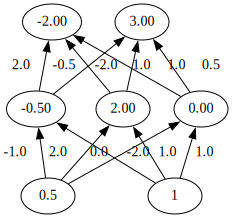

In [3]:
# define the weights
weights_input_hidden = np.array([[-1.0, 2.0, -2.0], [0.0, 1.0, 1.0]])
weights_hidden_output = np.array([[2.0, -2.0], [-0.5, 1.0], [1.0, 0.5]])

viznn([0.5, 1],weights_input_hidden,weights_hidden_output)

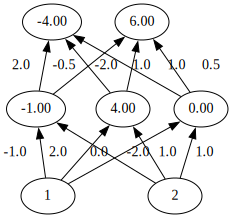

In [4]:
viznn([1, 2],weights_input_hidden,weights_hidden_output)

### Question 3 - SVM and Random Forest

In [4]:
# Importing the data 
df = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_2/ML/Assignment/data.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True) # Dropping the first column
df.shape

(10000, 82)

In [5]:
# Checking if there are any non-numeric values 
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True) #drop rows with nan
df.shape

(9358, 82)

In [6]:
# Identifying and replacing outliers with NA
for col in df.columns:
    if df[col].dtype != object:
        outliers = (df[col] < 0) | (df[col] >= 1000)
        df.loc[outliers, col] = np.nan
df.dropna(inplace=True) #drop rows with nan
df.shape

(9357, 82)

array([[<AxesSubplot: title={'center': 'Addthis'}>,
        <AxesSubplot: title={'center': 'Bebo'}>,
        <AxesSubplot: title={'center': 'Blogcatalog'}>,
        <AxesSubplot: title={'center': 'Blogger'}>,
        <AxesSubplot: title={'center': 'Buddymedia'}>,
        <AxesSubplot: title={'center': 'Cnet'}>,
        <AxesSubplot: title={'center': 'Conduit'}>,
        <AxesSubplot: title={'center': 'Customerlobby'}>,
        <AxesSubplot: title={'center': 'Delicious'}>],
       [<AxesSubplot: title={'center': 'Digg'}>,
        <AxesSubplot: title={'center': 'Diigo'}>,
        <AxesSubplot: title={'center': 'Docs'}>,
        <AxesSubplot: title={'center': 'Docstoc'}>,
        <AxesSubplot: title={'center': 'Download'}>,
        <AxesSubplot: title={'center': 'Dropbox'}>,
        <AxesSubplot: title={'center': 'Drupal'}>,
        <AxesSubplot: title={'center': 'Epinions'}>,
        <AxesSubplot: title={'center': 'Evernote'}>],
       [<AxesSubplot: title={'center': 'Facebook'}>,
      

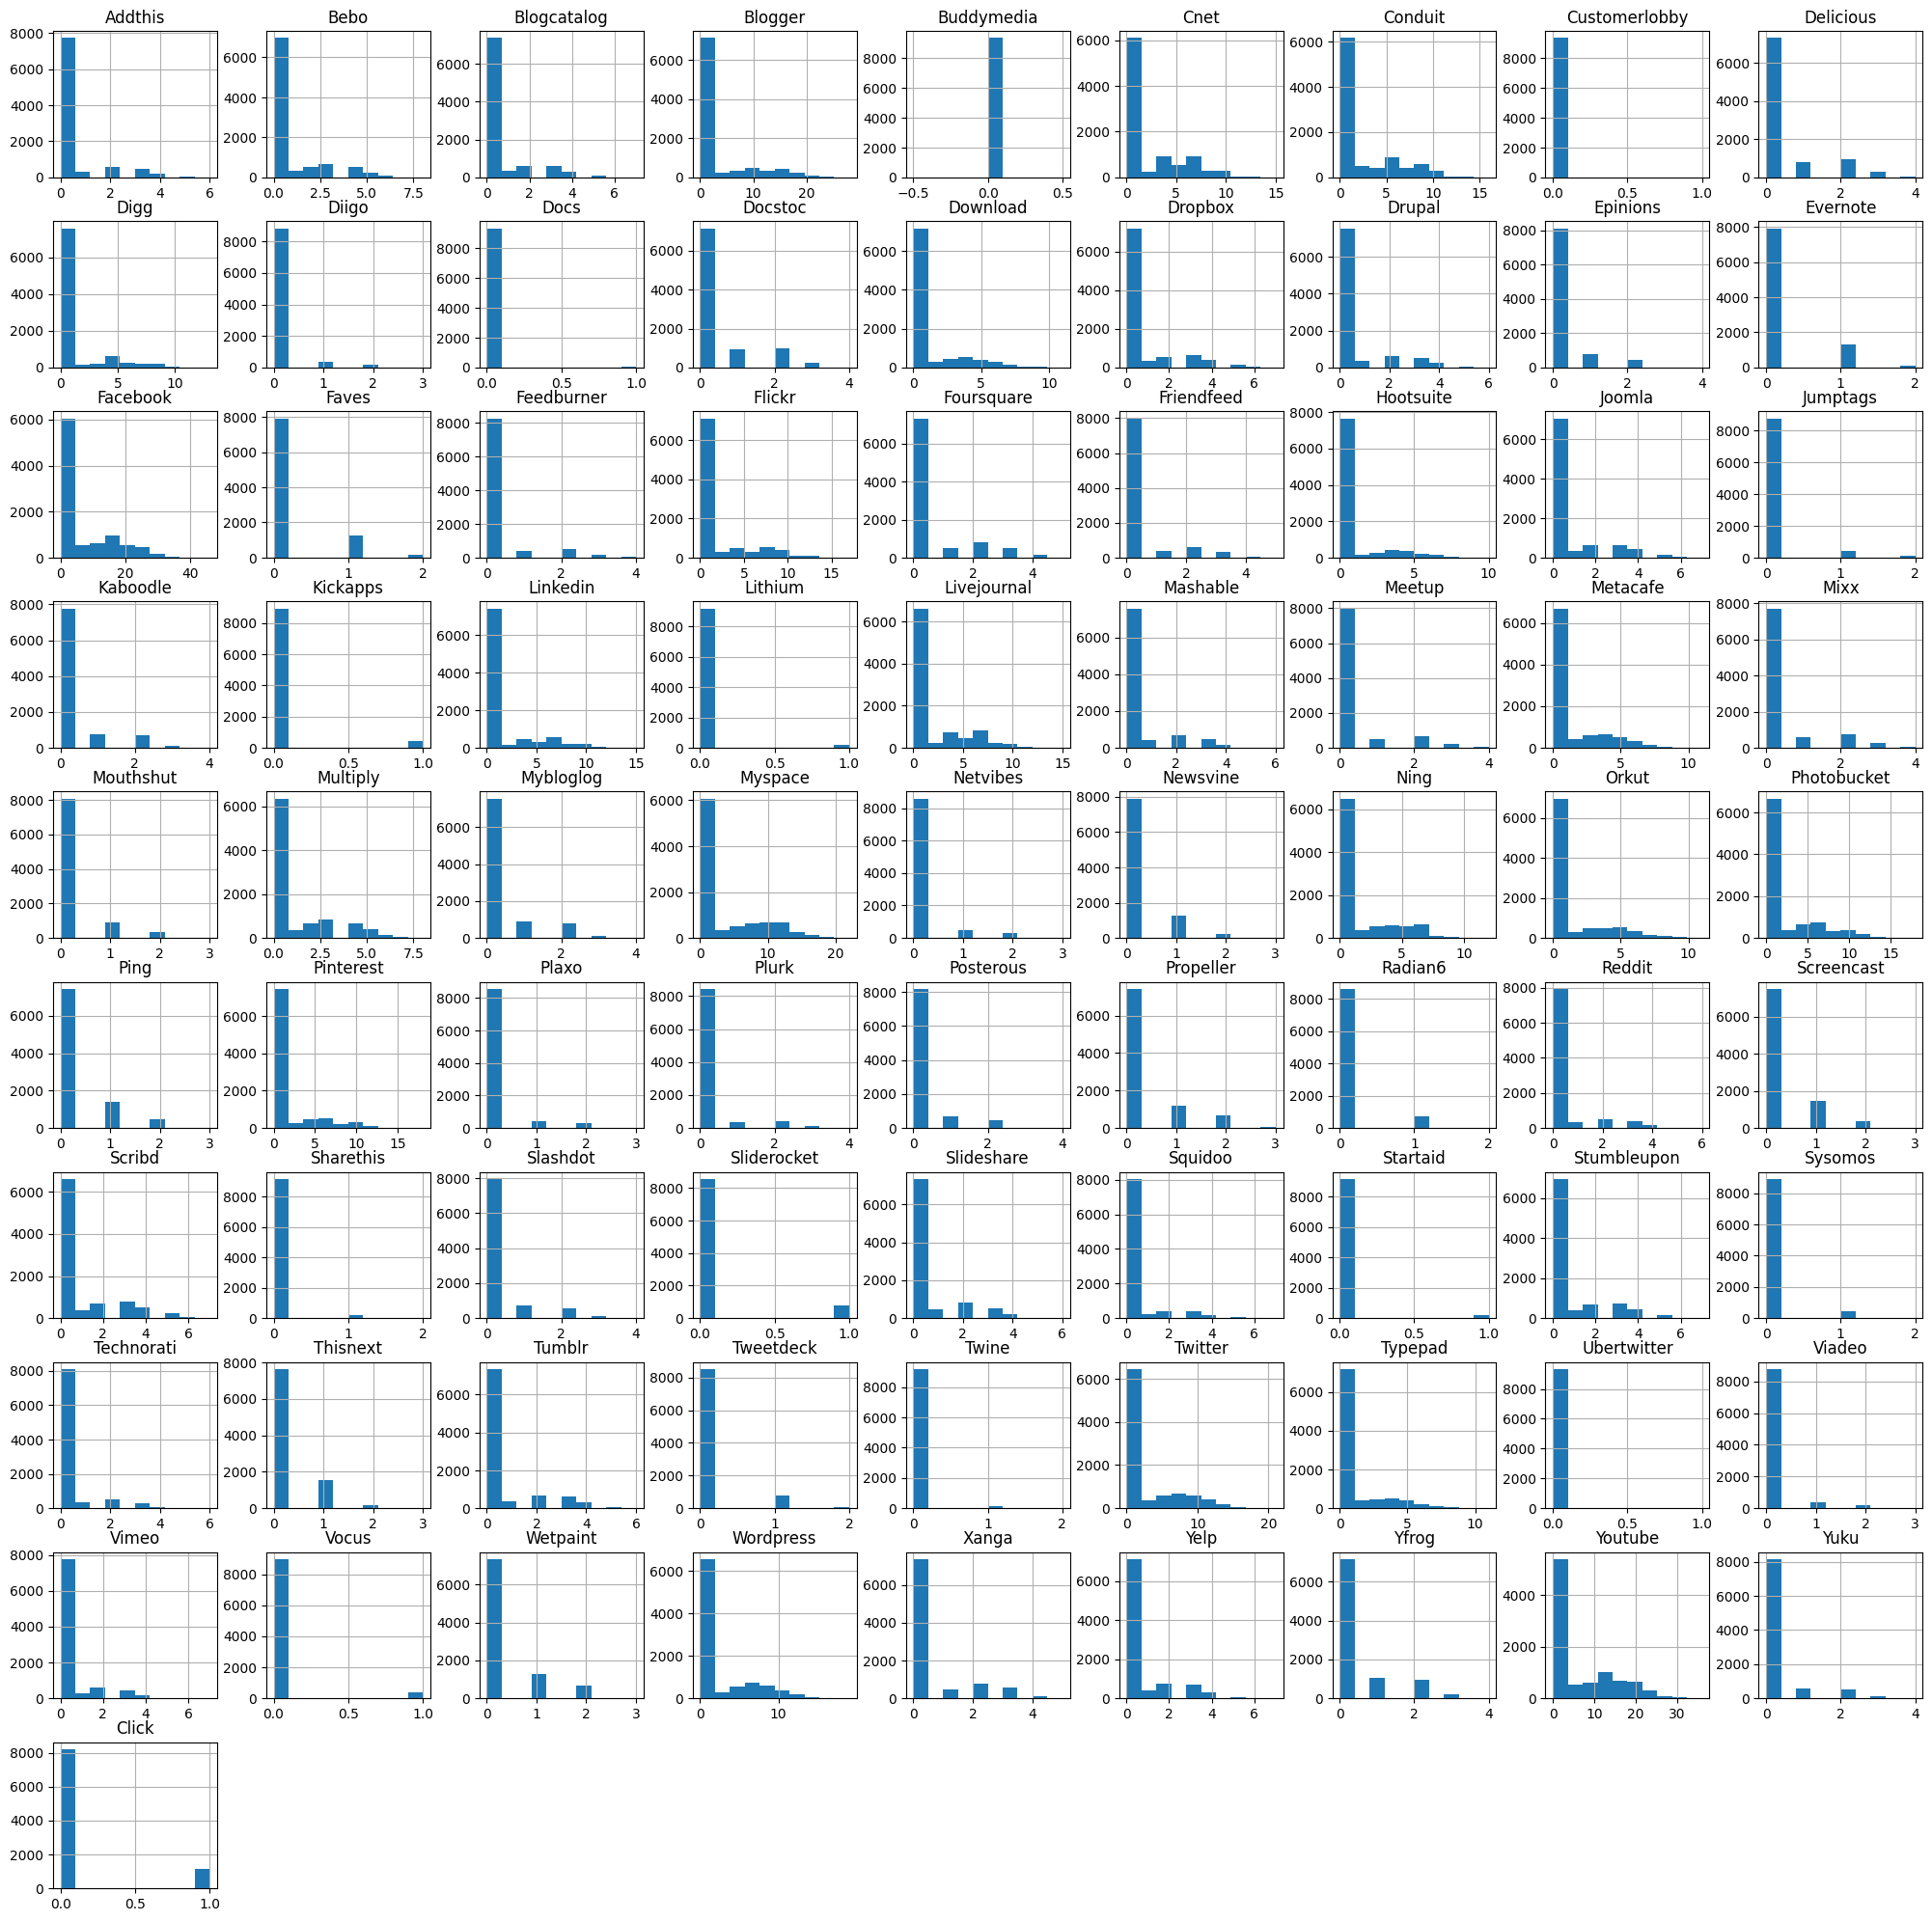

In [17]:
# Display the distribution with histograms 
df.hist(bins=10, figsize=(25,25))

#### 3.1 - Building and evaluating the models

In [7]:
# Splitting the data into training and testing sets 
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Building SVM and Random Forest Classifiers and fitting them to the training data 
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
# Evaluating the two models 
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\033[32mModel: \033[31m{model}\033[0m")
    print(classification_report(y_test, y_pred))
    print(f"\033[32mConfusion Matrix:\033[0m\n{confusion_matrix(y_test, y_pred)}")
    print("-"*70)


evaluate(svm, X_test, y_test)
evaluate(rf, X_test, y_test)

Model: SVC(kernel='linear')
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1637
         1.0       0.89      0.91      0.90       235

    accuracy                           0.97      1872
   macro avg       0.94      0.95      0.94      1872
weighted avg       0.98      0.97      0.98      1872

Confusion Matrix:
[[1610   27]
 [  20  215]]
----------------------------------------------------------------------
Model: RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      1637
         1.0       1.00      0.03      0.06       235

    accuracy                           0.88      1872
   macro avg       0.94      0.51      0.50      1872
weighted avg       0.89      0.88      0.82      1872

Confusion Matrix:
[[1637    0]
 [ 228    7]]
----------------------------------------------------------------------


In [10]:
# Performing Cross-validation 
scores_svm = cross_val_score(svm, X, y, cv=5)
scores_rf = cross_val_score(rf, X, y, cv=5)

print(f"SVM Cross-validation scores: {scores_svm}")
print(f"Random Forest Cross-validation scores: {scores_rf}")

SVM Cross-validation scores: [0.97596154 0.97115385 0.97594869 0.97862106 0.97006948]
Random Forest Cross-validation scores: [0.87873932 0.87873932 0.87867451 0.87760556 0.87814003]


#### 3.2 - Five most influential features

In [12]:
# Function for finding the five most influential features 
def top_five_features(model, feature_names, num_features): 
    feature_importances = model.feature_importances_ if hasattr(model, 'feature_importances_') else np.abs(model.coef_[0])
    feature_indices = np.argsort(feature_importances)[::-1][:num_features]
    top_features = [feature_names[i] for i in feature_indices]
    return top_features

In [13]:
# Getting the top five features from the Random Forest Classifier
top_rf = top_five_features(rf, X_train.columns, 5)
print("Top 5 features according to Random Forest Classifier:", top_rf)

# Getting the top five features from the SVM Classifier 
top_svm = top_five_features(svm, X_train.columns, 5)
print("Top 5 features according to SVM Classifier:", top_svm)

Top 5 features according to Random Forest Classifier: ['Wordpress', 'Blogger', 'Livejournal', 'Typepad', 'Yelp']
Top 5 features according to SVM Classifier: ['Thisnext', 'Kickapps', 'Mybloglog', 'Epinions', 'Customerlobby']


In [14]:
# Function for plotting the importance
def plot_feature_importances(model, X, n=5):

    # We use the coefficient for SVM and the feautre importance for Random Forest 
    if hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])
    else:
        importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:n]
    features = X.columns
    
    # Plotting top five important features
    plt.figure(figsize=(10, 6))
    plt.title("Top Five Most Important Features, Classifier: {}".format(model))
    plt.bar(range(n), importances[indices])
    plt.xticks(range(n), [features[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

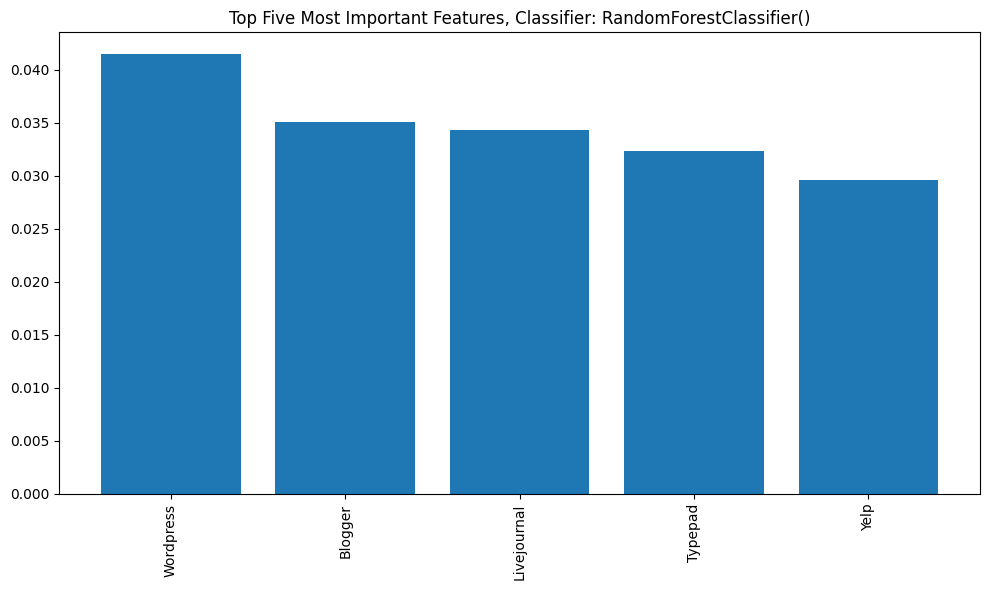

In [15]:
# Plot the feature importance form the Random Forest Classifier
plot_feature_importances(rf, X_test, n=5)

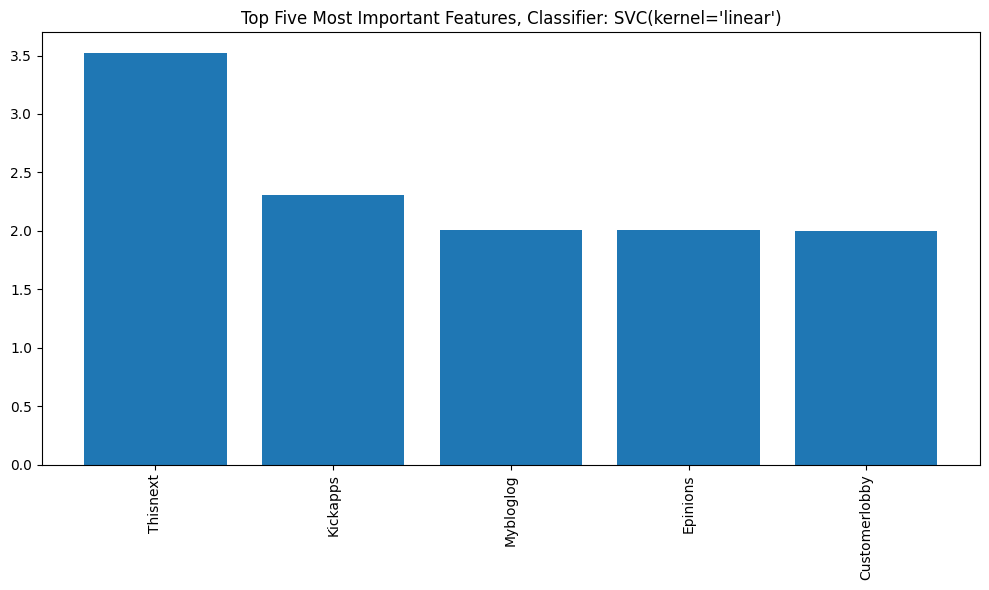

In [16]:
# Plot the feature importance from the SVM Classifier
plot_feature_importances(svm, X_test, n=5)

#### 3.3 - Recommendation 

See PDF file

#### 3.4 - Marketing expenses recommendation

In [19]:
# Function to calculate cost per click per channel
def cost_per_click(df):
    impressions = df.iloc[:,:-1].sum()
    clicks = df.iloc[:,-1].sum()
    cost_per_impression = 0.1 # assuming 0.10 DKK per impression
    cost_per_click = cost_per_impression * (impressions / clicks)
    return cost_per_click

# Calculate cost per click for each channel
costs = cost_per_click(df)

# Print top five best channels based on cost per click
top_five_channels = costs.nsmallest(5).index
print("Top 5 channels based on cost per click:")
print(top_five_channels)

Top 5 channels based on cost per click:
Index(['Buddymedia', 'Customerlobby', 'Ubertwitter', 'Docs', 'Twine'], dtype='object')
